In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../datasets/weight_height.csv",
                 encoding="euc-kr",
                 usecols=["학교명", "학년", "성별", "키", "몸무게"])
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [3]:
# df["학교명"] -> 초등학교 = 0 / 중학교 = 6 / 고등학교 = 9 + df["학년"]
df["grade"] = df["학교명"].map(lambda x : 0 if x.endswith("초등학교")
                            else 6 if x.endswith("중학교")
                            else 9) + df["학년"]
df

,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [4]:
df.drop(["학교명", "학년"], axis="columns", inplace=True)
df.columns = ["gender", "height", "weight", "grade"]
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [5]:
# 남 : 0 / 여 : 1
df["gender"] = df["gender"].map(lambda x : 0 if x == "남" else 1)
df

,gender,height,weight,grade
0,0,125.8,27.3,1
1,0,124.3,25.4,1
2,0,119.2,23.5,1
3,0,115.0,20.0,1
4,0,120.0,33.5,1
...,...,...,...,...
9681,0,176.1,50.4,12
9682,0,174.1,88.8,12
9683,0,169.5,63.2,12
9684,1,159.2,52.9,12


In [6]:
# 몸무게와 키를 통해서 성별 예측하고 싶다!!

x = df[["weight", "height"]]
y = df[["gender"]]

In [7]:
df.dropna(inplace=True)

x = df[["weight", "height"]]
y = df[["gender"]]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train, y_train)

c:\Users\student\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
predict = model.predict(x_test)

In [12]:
model.score(x_test, y_test)

0.5290877796901893

In [13]:
model.predict([[70, 170]])

c:\Users\student\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [14]:
y_test["predict"] = predict
y_test

,gender,predict
1810,1,1
8100,0,0
7661,0,0
9573,0,0
4903,1,0
...,...,...
8957,1,0
2819,0,1
2509,1,1
6320,1,0


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, \
f1_score, precision_recall_curve, roc_curve, roc_auc_score

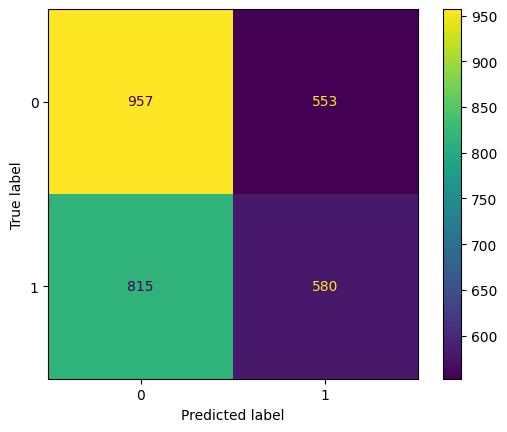

In [16]:
cm = confusion_matrix(y_test["gender"], y_test["predict"])
ConfusionMatrixDisplay(cm).plot()

In [17]:
cm.ravel()

array([957, 553, 815, 580])

In [ ]:
# 남학생 기준
TP, FN, FP, TN = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [20]:
print(precision)
print(precision_score(y_test["gender"], predict, average=None))

0.5400677200902935
[0.54006772 0.51191527]


In [21]:
print(recall)
print(recall_score(y_test["gender"], predict, average=None))

0.633774834437086
[0.63377483 0.41577061]


In [22]:
my_f1_score = 2 * (precision * recall) / (precision + recall)

In [23]:
print(my_f1_score)
print(f1_score(y_test["gender"], predict, average=None))

0.583180987202925
[0.58318099 0.45886076]


In [24]:
# 여학생 (1과 0기준 -> 0 과 1기준이었던 cm 뒤집힌
TN, FP, FN, TP = cm.ravel()

In [25]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [26]:
print(precision)
print(precision_score(y_test["gender"], predict, average=None))

0.5119152691968226
[0.54006772 0.51191527]


In [27]:
print(recall)
print(recall_score(y_test["gender"], predict, average=None))

0.4157706093189964
[0.63377483 0.41577061]


In [28]:
my_f1_score = 2 * (precision * recall) / (precision + recall)
print(my_f1_score)
print(f1_score(y_test["gender"], predict, average=None))

0.4588607594936709
[0.58318099 0.45886076]


In [29]:
proba = model.predict_proba(x_test)

In [30]:
import matplotlib.pyplot as plt

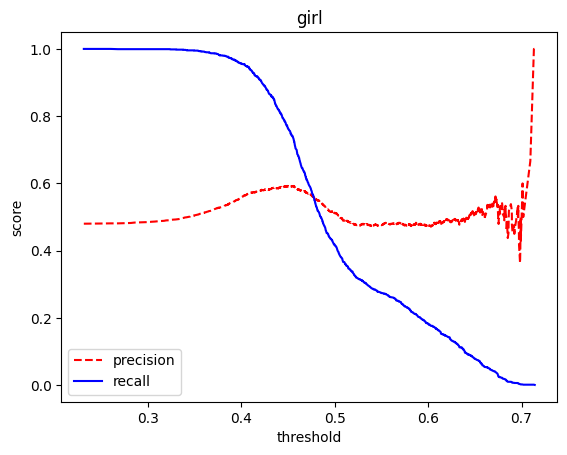

In [31]:
precision, recall, threshold = precision_recall_curve(y_test["gender"], proba[:, 1], pos_label=1)

plt.xlabel("threshold")
plt.ylabel("score")
plt.plot(threshold, precision[:len(threshold)], "red", linestyle="--", label="precision")
plt.plot(threshold, recall[:len(threshold)], "blue", label="recall")

plt.legend()
plt.title("girl")
plt.show()

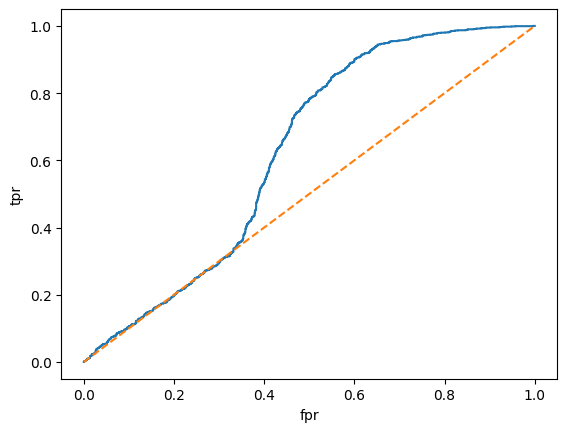

In [32]:
fpr, tpr, threshold = roc_curve(y_test["gender"], proba[:, 1], pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [33]:
roc_auc_score(y_test, proba)

0.6876194545325073